In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d tharakan684/urecamain

Dataset URL: https://www.kaggle.com/datasets/tharakan684/urecamain
License(s): copyright-authors
 97% 94.0M/96.8M [00:05<00:00, 21.6MB/s]
100% 96.8M/96.8M [00:05<00:00, 19.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/urecamain.zip"
with ZipFile(file_name, 'r') as zip:
  #zip.printdir()
  print("exctracted")
  zip.extractall()

exctracted


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
#path to file
train_dir = "Train"
validation_dir = "Vali"
test_dir = "Test"

img_size = (128, 128)
batch_size = 32
#load traing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (fire vs non-fire)
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


fire = 0 , Non-fire = 1

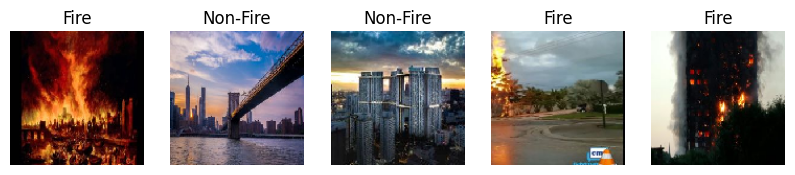

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of training data
sample_batch = next(train_generator)
images, labels = sample_batch

# Display the first 5 images in the batch
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title("Fire" if labels[i] == 0 else "Non-Fire")
    plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

input_shape = (128, 128, 3)  # Resized image shape


# MobileNetV2 model without the top layer (output layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

base_model.trainable = False

# new model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global average pooling layer
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 10

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 102s 506ms/step - accuracy: 0.8862 - loss: 0.2481 - val_accuracy: 0.9521 - val_loss: 0.1245
Epoch 2/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 57s 308ms/step - accuracy: 0.9062 - loss: 0.4290

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.4290 - val_accuracy: 0.9375 - val_loss: 0.0903
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 93s 497ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.9456 - val_loss: 0.1401
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 1.0000 - loss: 0.0336 - val_accuracy: 0.9375 - val_loss: 0.4193
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 93s 499ms/step - accuracy: 0.9930 - loss: 0.0267 - val_accuracy: 0.9435 - val_loss: 0.1565
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9688 - loss: 0.0938 - val_accuracy: 0.9375 - val_loss: 0.0880
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 101s 538ms/step - accuracy: 0.9955 - loss: 0.0185 - val_accuracy: 0.9370 - val_loss: 0.1691
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.9375 - val_loss: 0.1723
Epoch 9/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 94s 504ms/step - accuracy: 0.9989 - loss: 0.0093 - val_accura

In [ ]:
# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.9414 - loss: 0.1457
Validation Loss: 0.14168037474155426
Validation Accuracy: 0.9455000162124634


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'test Loss: {test_loss}')
print(f'test Accuracy: {test_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 384ms/step - accuracy: 0.9524 - loss: 0.1577
test Loss: 0.15824688971042633
test Accuracy: 0.9505000114440918


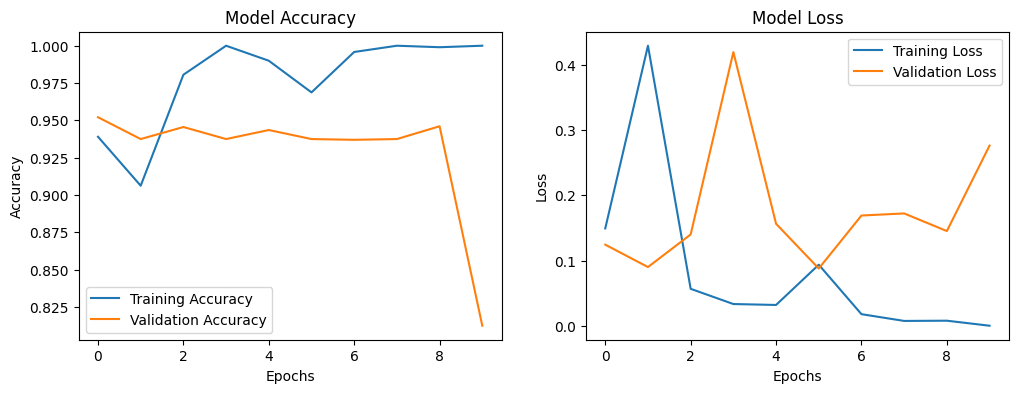

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
